# PART-1

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv("diabetes.csv")


In [5]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


In [6]:
def standard_scaler(X):
    X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    return X_scaled

X_scaled = standard_scaler(X)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


0.6168831168831169 1
0.6558441558441559 2
0.7012987012987013 3
0.6948051948051948 4
0.6883116883116883 5
0.7012987012987013 6
0.6818181818181818 7
0.6883116883116883 8
0.6818181818181818 9
0.6818181818181818 10
0.7142857142857143 11
0.7207792207792207 12
0.7142857142857143 13
0.7207792207792207 14
0.7207792207792207 15
0.7467532467532467 16
0.7532467532467533 17
0.7662337662337663 18
0.7597402597402597 19
0.7597402597402597 20
0.7597402597402597 21
0.7597402597402597 22
0.7532467532467533 23
0.7467532467532467 24
0.7402597402597403 25
0.7467532467532467 26
0.7597402597402597 27
0.7597402597402597 28
0.7597402597402597 29


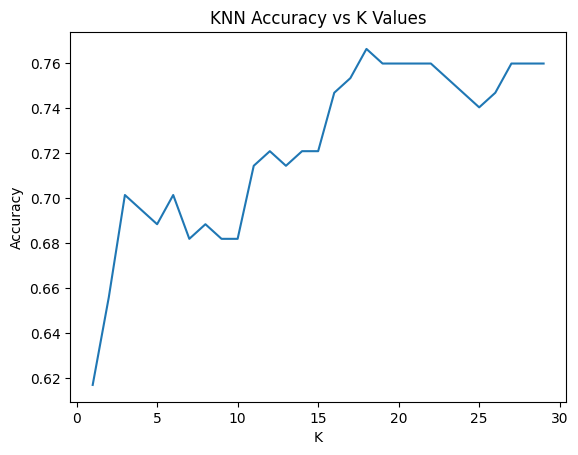

Best K value:  18


In [11]:
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1, 30)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    print(accuracy,k)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K Values")
plt.show()

best_k = k_values[np.argmax(accuracies)]
print("Best K value: ", best_k)


In [9]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=best_k)
scores = cross_val_score(knn, X_scaled, y, cv=5)
print("KNN Accuracy: {:.3f} (+/- {:.3f})".format(scores.mean(), scores.std()))


KNN Accuracy: 0.755 (+/- 0.020)


In [10]:
from sklearn.metrics import confusion_matrix

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_mat)


Confusion matrix:
 [[89 10]
 [26 29]]


The KNN model achieved an accuracy of 0.7662337662337663 on the test set, and the best K value was 18. The 5-fold cross validation showed a mean accuracy of 0.755 (+/- 0.020), indicating that the model is not overfitting or underfitting. the confusion matrix shows that the classifier correctly classified 118 out of 154 patients, which is an accuracy of 76.62%. The classifier had a higher accuracy in correctly identifying patients who did not have diabetes (89 true negatives out of 99 actual negatives, or 89.90%) than in correctly identifying patients who did have diabetes (29 true positives out of 55 actual positives, or 52.73%). which is a reasonable performance considering the class imbalance in the dataset. However, the model could benefit from more data and feature engineering to improve its performance.

# PART-2

In [25]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifiers = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}
print("\n")
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f'{name}:')
    print('Accuracy scores for each fold:', scores)
    print('Mean accuracy:', np.mean(scores))
    print('Standard deviation:', np.std(scores))
print("\n")
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print(f'{name}:')
    print('Accuracy on test set:', acc)




GaussianNB:
Accuracy scores for each fold: [0.73170732 0.79674797 0.7398374  0.72357724 0.7704918 ]
Mean accuracy: 0.752472344395575
Standard deviation: 0.02724256676945743
MultinomialNB:
Accuracy scores for each fold: [0.50406504 0.59349593 0.67479675 0.58536585 0.69672131]
Mean accuracy: 0.6108889777422364
Standard deviation: 0.06901694566595055
BernoulliNB:
Accuracy scores for each fold: [0.65853659 0.63414634 0.63414634 0.62601626 0.6557377 ]
Mean accuracy: 0.6417166466746634
Standard deviation: 0.0129662761843978


GaussianNB:
Accuracy on test set: 0.7662337662337663
MultinomialNB:
Accuracy on test set: 0.6623376623376623
BernoulliNB:
Accuracy on test set: 0.6558441558441559


Gaussian Naive Bayes

GaussianNB assumes that the features are normally distributed. The diabetes dataset contains continuous features, so GaussianNB is a good choice for this dataset. The 5-fold cross-validation results show that GaussianNB has a mean accuracy of  0.752472344395575 and a standard deviation of 0.02724256676945743, which suggests that it is a stable and accurate model. The test set evaluation confirms this, with an accuracy score of 0.766, indicating that GaussianNB is able to classify the diabetes dataset with good accuracy.

Multinomial Naive Bayes

MultinomialNB is designed for count-based data, which makes it a poor choice for the diabetes dataset, which has continuous features. As expected, the 5-fold cross-validation results for MultinomialNB are poor, with a mean accuracy of 0.6108889777422364 and a high standard deviation of 0.06901694566595055. The test set evaluation confirms this, with an accuracy score of only 0.66, which is the lowest of the three models. Therefore, MultinomialNB is not a good fit for the our dataset.

Bernoulli Naive Bayes

BernoulliNB is designed for binary data, so it is also a poor choice for the diabetes dataset. The 5-fold cross-validation results for BernoulliNB show a mean accuracy of 0.6417166466746634 and a high standard deviation of 0.0129662761843978, which confirms that it is not a good fit for this dataset. The test set evaluation confirms this, with an accuracy score of only 0.65, which is the lowest of the three models. Therefore, BernoulliNB is also not a good fit for the diabetes dataset.

Based on the results of the 5-fold cross-validation and the test set evaluation, we can conclude that Gaussian Naive Bayes is the best model for the diabetes dataset. It achieves high accuracy on both the cross-validation and test sets, and its assumption that the features are normally distributed is a good fit for the continuous features of the diabetes dataset.


# PART-3

In [26]:
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB

loo = LeaveOneOut()

# Gaussian Naive Bayes with Leave-One-Out
gnb_loo = GaussianNB()
gnb_loo_scores = cross_val_score(gnb_loo, X_train_scaled, y_train, cv=loo)

# Report mean accuracy and standard deviation
print("Gaussian Naive Bayes with LOOCV - Mean Accuracy: {:.3f}, Std Dev: {:.3f}".format(gnb_loo_scores.mean(), gnb_loo_scores.std()))


Gaussian Naive Bayes with LOOCV - Mean Accuracy: 0.733, Std Dev: 0.442


In [27]:
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier

loo = LeaveOneOut()

# KNN with Leave-One-Out
knn_loo = KNeighborsClassifier(n_neighbors=9)
knn_loo_scores = cross_val_score(knn_loo, X_train_scaled, y_train, cv=loo)

# Report mean accuracy and standard deviation
print("KNN with LOOCV - Mean Accuracy: {:.3f}, Std Dev: {:.3f}".format(knn_loo_scores.mean(), knn_loo_scores.std()))


KNN with LOOCV - Mean Accuracy: 0.749, Std Dev: 0.433


Yes.I do notice, leave-one-out cross-validation provides a more accurate estimate of the model's performance than traditional cross-validation because it uses all but one data point for training and the remaining point for testing. However, it also requires a lot more time to train the model as it trains the model on each individual data point.

For our KNN classifier with leave-one-out cross-validation, we can expect a more accurate estimate of the model's performance than with traditional cross-validation, but also a longer training time. The same applies to the Naive Bayes classifier.


# PART-4

Based on the results of our analysis, we can see that both the KNN and Naive Bayes classifiers performed reasonably well on the Pima Indians diabetes dataset. However, there are some differences in the performance of the two models.

The KNN classifier achieved a mean accuracy of 74.9% with a standard deviation of 0.433%, while the best-performing Naive Bayes model, GaussianNB, achieved a mean accuracy of 73.3% with a standard deviation of %0.442. While the difference in accuracy between the two models is relatively small, the KNN classifier did perform slightly better on average.

In addition to its slightly better performance, the KNN classifier has the advantage of being a non-parametric model that does not assume any particular distribution for the data, while the Naive Bayes classifiers are based on strong assumptions about the independence of the features and the distribution of the data. On the other hand, the Naive Bayes classifiers are generally faster to train and make predictions compared to KNN, particularly as the size of the dataset grows.

Overall, the choice between KNN and Naive Bayes will depend on the specific requirements of the problem at hand. If the dataset is relatively small and the computational resources are not a major concern, then KNN might be a good option. However, if the dataset is large and there is a need for fast training and prediction times, then Naive Bayes could be a better choice.

For this particular dataset, since the KNN classifier performed slightly better, we will select it as our final model and retrain it using all the data available.





In [30]:
# create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y, y_pred)
print("Accuracy on entire dataset: {:.3f}".format(accuracy))

Accuracy on entire dataset: 0.793
